In [38]:
!pip install -r requirements.txt

# 1. 데이터 전처리

## 1) 데이터 불러오기

데이터수 : 7,000개
칼럼 수: 6개

| 변수명 | 설명 |
|:-------------------------------|:-------------------------------------------------------------|
| **Hours Studied** | 각 학생이 공부에 소요한 총 시간 |
| **Previous Scores** | 학생들이 이전 시험에서 얻은 점수 |
| **Extracurricular Activities** | 학생이 과외 활동에 참여하는지 여부 *(예 / 아니오)* |
| **Sleep Hours** | 학생이 하루 평균 수면 시간 |
| **Sample Question Papers Practiced** | 학생이 연습한 모의고사 수 |
| **Performance Index** | 목표변수. 각 학생의 전반적인 성취도를 나타내는 지표<br> (성취도 지수는 10~100 사이 정수이며, 값이 높을수록 더 나은 성취도를 의미함) |




In [3]:
import pandas as pd

df = pd.read_csv('./data/mission15_train.csv')

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,6,73,No,7,2,58.0
1,1,89,Yes,7,2,64.0
2,3,97,Yes,8,0,75.0
3,8,70,No,5,5,59.0
4,7,94,Yes,7,4,86.0


In [13]:
df.shape

(7000, 6)

## 2) 결측치 확인


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## 3) 데이터 타입 확인

In [5]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## 4) 범주형 인코딩

In [6]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [7]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## 5) 이상치 탐색

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# ===== 1. 기본 통계 확인 =====
print("=== describe() ===")
display(df[['Hours Studied', 'Sleep Hours']].describe())


=== describe() ===


,Hours Studied,Sleep Hours
count,7000.000000,7000.000000
mean,4.950000,6.530571
std,2.590621,1.696144
min,1.000000,4.000000
25%,3.000000,5.000000
50%,5.000000,7.000000
75%,7.000000,8.000000
max,9.000000,9.000000


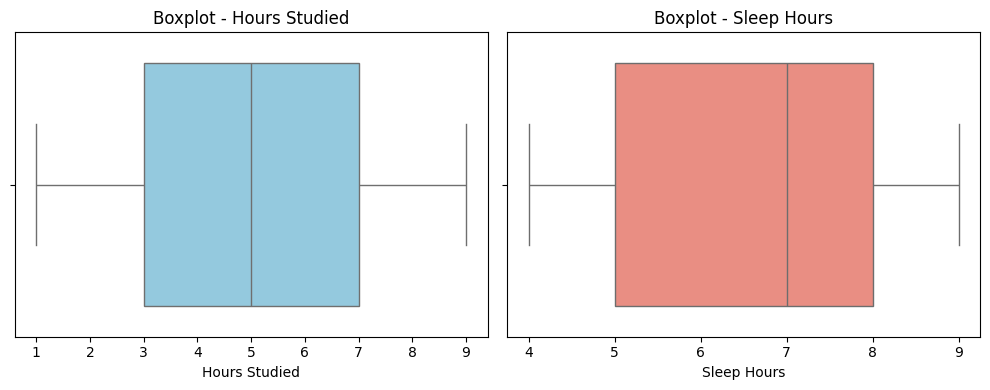

In [19]:
# ===== 2. Boxplot으로 시각화 =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Hours Studied'], color='skyblue')
plt.title('Boxplot - Hours Studied')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Sleep Hours'], color='salmon')
plt.title('Boxplot - Sleep Hours')

plt.tight_layout()
plt.show()

In [20]:
# ===== 3. 이상치 개수 확인 함수 =====
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

In [21]:
# Hours Studied
hours_outliers, hours_lower, hours_upper = detect_outliers_iqr(df['Hours Studied'])
print(f"[Hours Studied] 이상치 개수: {len(hours_outliers)}개")
print(f" - 하한: {hours_lower:.2f}, 상한: {hours_upper:.2f}")

# Sleep Hours
sleep_outliers, sleep_lower, sleep_upper = detect_outliers_iqr(df['Sleep Hours'])
print(f"[Sleep Hours] 이상치 개수: {len(sleep_outliers)}개")
print(f" - 하한: {sleep_lower:.2f}, 상한: {sleep_upper:.2f}")


[Hours Studied] 이상치 개수: 0개
 - 하한: -3.00, 상한: 13.00
[Sleep Hours] 이상치 개수: 0개
 - 하한: 0.50, 상한: 12.50


# 2. EDA(탐색적 데이터 분석)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1) 기본 통계 확인

In [31]:
display(df.describe)

<bound method NDFrame.describe of       Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 6               73                           0            7   
1                 1               89                           1            7   
2                 3               97                           1            8   
3                 8               70                           0            5   
4                 7               94                           1            7   
...             ...              ...                         ...          ...   
6995              7               68                           0            6   
6996              6               59                           0            8   
6997              6               57                           1            7   
6998              8               80                           0            7   
6999              9               87                           1           

In [40]:
display(df['Performance Index'].describe())

count    7000.000000
mean       55.095143
std        19.151574
min        10.000000
25%        40.000000
50%        55.000000
75%        70.000000
max       100.000000
Name: Performance Index, dtype: float64

## 2) 상관관계 히트맵

- 관찰 결과
  - `Previous Score`와 `Performance Index`의 상관계수 **0.91** -> 매우 강한 양의 상관관계
  - `Hour Studied`는 **0.37** -> 중간 정도의 양의 상관관계
  - `Sleep Hours`, `Sample Question Papers Practiced`, `Extracurricular Activities`는 상관관계가 거의 없음
- 인사이트
  - 이전 시험 점수가 현재 성취도를 가장 잘 예측하는 변수
  - 공부 시간도 어느정도 긍정적인 영향
  - 수면 시간과 과외 활동은 거의 영향이 없음
- 가설
  - 이전 점수가 높을수록 성취도가 높을 것이다.
  - 공부 시간이 늘어날수록 성취도도 완만히 증가할 것이다.

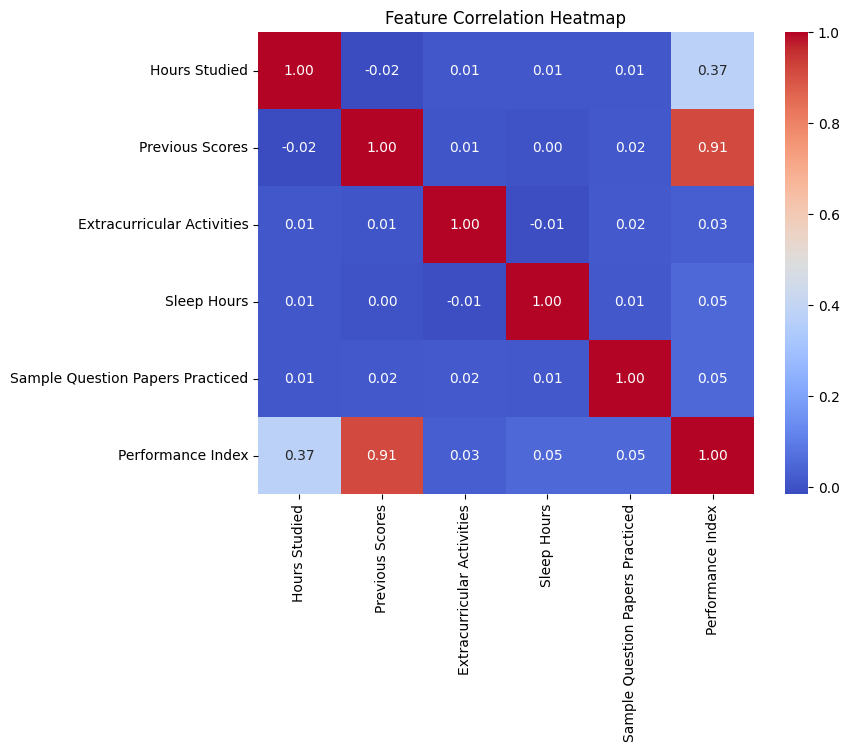

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## 3) 산점도 (Hours Studied vs Performance Index)

- 관찰결과
  - 공부 시간이 늘수록 성취도가 증가하는 경향
  - 약한 양의 선형 관계
- 인사이트
  - 공부 시간은 성취도에 일정한 영햐이 있음
  - 이미 높은 `Previous Scores`를 가진 학생들에 비하면 영향력이 작음

Text(0.5, 1.0, 'Hours Studied vs Performance Index')

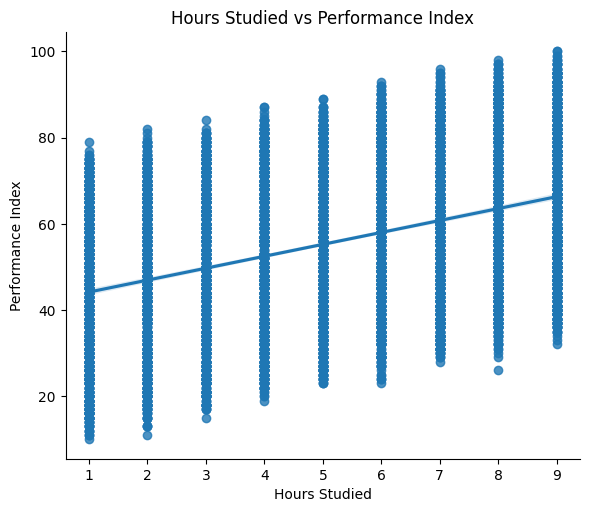

In [ ]:
sns.lmplot(x='Hours Studied', y='Performance Index', data=df, height=5, aspect=1.2)
plt.title('Hours Studied vs Performance Index')

## 4) 산점도 (Previous Scores vs Performance Index)

- 관찰 결과
  - 거의 완벽한 직선 관계
  - 이전 점수와 현재 성취도를 예측하는 주요 변수
- 인사이트
  - `Previous Scores`는 성취도 예측의 핵심 피처
  - 단일 변수로도 상당한 예측력이 있을 가능성이 있음

Text(0.5, 1.0, 'Previous Scores vs Performance Index')

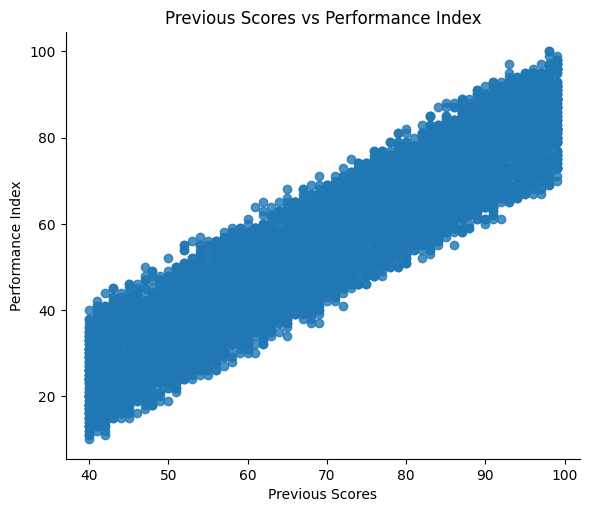

In [ ]:
sns.lmplot(x='Previous Scores', y='Performance Index', data=df, height=5, aspect=1.2)
plt.title('Previous Scores vs Performance Index')

## 5) 범주형 변수 비교

- 관찰 결과
  - 과외활동 여부(0/1)에 따라 중앙값 차이가 거의 없음
  - 과외활동 참여 여부가 성취도에 큰 차이를 만들지 않음
- 인사이트
  - 모델 성능에 기여도가 낮은 피처일 가능성이 있음
  - 우선 포함 -> 중요도로 확인

/var/folders/_z/zvt0hmz140584wlswfx5gkk40000gn/T/ipykernel_7047/673892637.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df, palette='Set2')


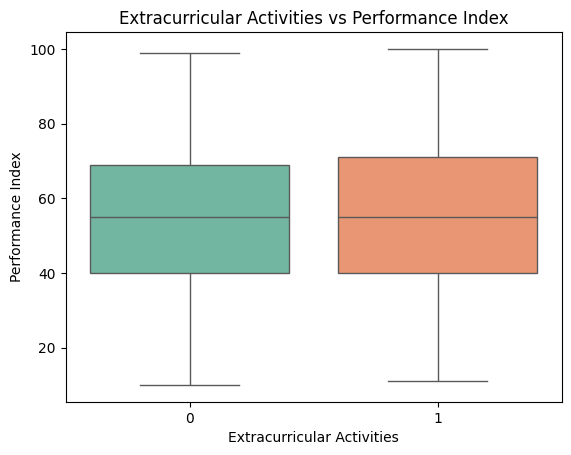

In [37]:
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df, palette='Set2')
plt.title('Extracurricular Activities vs Performance Index')
plt.show()


## 🧩 EDA 결과 요약 + 모델 선택 근거


### 📊 1️⃣ 주요 인사이트 요약

| 변수명 | 상관계수(Performance Index) | 인사이트 | 영향 수준 |
|:-------------------------------|:------------------------------------:|:-----------------------------------------------|:-----------:|
| **Previous Scores** | **0.91** | 이전 점수가 높을수록 성취도가 높음 | 🔥 매우 큼 |
| **Hours Studied** | 0.37 | 공부 시간이 많을수록 성취도 상승 경향 | 🟢 중간 |
| **Sleep Hours** | 0.05 | 수면시간은 성취도와 거의 무관 | ⚪ 낮음 |
| **Sample Question Papers Practiced** | 0.05 | 연습문제 풀이 수는 큰 영향 없음 | ⚪ 낮음 |
| **Extracurricular Activities** | 0.03 | 과외활동 여부는 성취도에 큰 차이 없음 | ⚪ 낮음 |

-----

### 📈 2️⃣ 시각화 결과 해석

1. **상관관계 히트맵**
   - `Previous Scores`와 `Performance Index`의 상관계수는 **0.91**로 매우 높음  
   - `Hours Studied`는 0.37로 중간 수준의 양의 상관관계  
   - 나머지 변수들은 거의 0에 가까워 영향이 미미함

2. **Hours Studied vs Performance Index (산점도)**
   - 공부 시간이 많을수록 성취도가 완만히 증가하는 경향을 보임  
   - 다만 완벽한 직선 관계는 아님 (약간의 분산 존재)

3. **Previous Scores vs Performance Index (산점도)**
   - 거의 완벽한 직선 형태 → **이전 점수가 성취도를 강하게 예측**  
   - 단일 변수만으로도 높은 설명력을 가질 가능성이 있음

4. **Extracurricular Activities vs Performance Index (박스플롯)**
   - 과외활동 참여 여부에 따른 성취도 차이는 거의 없음  
   - 이 변수는 예측 모델에서 중요도가 낮을 가능성이 큼

---

### 🧠 3️⃣ 가설 정리

- **H1.** 이전 점수(`Previous Scores`)가 높을수록 성취도(`Performance Index`)가 높을 것이다.  
- **H2.** 공부 시간(`Hours Studied`)이 많을수록 성취도가 상승할 것이다.  
- **H3.** 수면시간(`Sleep Hours`)과 과외활동(`Extracurricular Activities`)은 성취도에 유의미한 영향을 주지 않을 것이다.

---

### 🤖 4️⃣ 모델 선택 근거

EDA 결과, 대부분의 변수들이 **성취도와 선형 관계를 보임**에 따라  
다음과 같은 회귀 모델을 선택하였다.

| 모델 | 역할 | 선택 이유 |
|:-------|:------|:-----------|
| **Ridge Regression** | 주요 모델 | 변수 간 선형 관계 기반, L2 정규화로 과적합 방지 |
| **Random Forest Regressor** | 보조 비교 모델 | 비선형 패턴 존재 여부 확인용 |

---

### 🧾 5️⃣ 종합 결론

EDA를 통해, 학생의 **이전 점수(Previous Scores)** 와 **공부 시간(Hours Studied)** 이 성취도를 결정하는 핵심 요인임을 확인하였다.  
이에 따라 본 분석에서는 **선형 회귀 계열 모델(Ridge Regression)** 을 중심으로 회귀 분석을 진행하고,  
비선형 모델(Random Forest)과의 성능을 비교하여 최적의 예측 모델을 도출할 예정이다.
